# Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1:
- Import the boston house dataset from `sklearn.datasets`. 

`from sklearn.datasets import load_boston`

`boston = load_boston()`

- Create train and test datasets. 

- Check the data description and familiarize yourself with the data.

In [6]:
from sklearn.datasets import load_boston 

y = load_boston().target
X = load_boston().data

/opt/homebrew/Caskroom/miniforge/base/envs/tf_M1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

In [9]:
X.shape, y.shape

((506, 13), (506,))

In [15]:
np.mean(y),np.median(y)

(22.532806324110677, 21.2)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [32]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

### Step 2:
Create a scatter plot of each attribute with the mean house price.

In [36]:
col_names = boston.feature_names

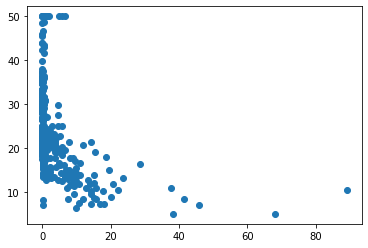

In [29]:
plt.scatter(X_train[:,0], y_train)

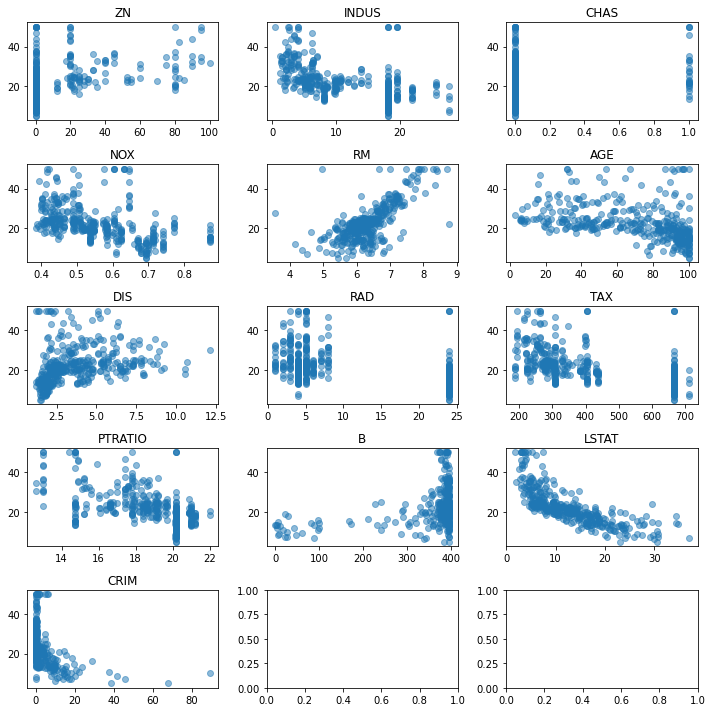

In [65]:
fig, ax= plt.subplots(5,3,figsize=(10,10))
for i in range(1,(X_train.shape[1])):
    plt.subplot(5,3,i)
    plt.scatter(X_train[:,i],y_train, alpha=0.5)
    plt.title(col_names[i])

plt.subplot(5,3, 13)
plt.scatter(X_train[:, 0], y_train, alpha=0.5)
plt.title(col_names[0])
plt.tight_layout()


### Step 3:
Create a box plot of all attributes.

{'whiskers': [<matplotlib.lines.Line2D at 0x16b3068e0>,
 'caps': [<matplotlib.lines.Line2D at 0x16b306eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16b0c4730>,
 'medians': [<matplotlib.lines.Line2D at 0x16b31a490>,
 'fliers': [<matplotlib.lines.Line2D at 0x16b31a760>,
 'means': []}

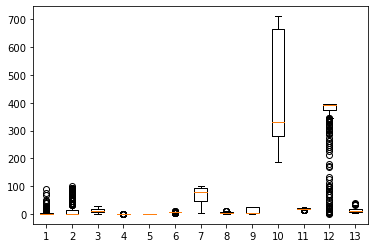

In [33]:
plt.boxplot(X)

### Step 4:
Use `StandardScaler()` to scale the trainin data set.

In [37]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### Step 5:
Use `KNeighborsRegressor()` to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [40]:
from sklearn.neighbors import KNeighborsRegressor

knn1 = KNeighborsRegressor(5)
knn1.fit(X_train, y_train)
print('train score with not-scaled data', knn1.score(X_train, y_train))
print('test score with not-scaled data', knn1.score(X_test, y_test))


train score with not-scaled data 0.7066272660046313
test score with not-scaled data 0.4616380924610112


In [42]:
knn2= KNeighborsRegressor(5)
knn2.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print('train score with scaled data', knn2.score(X_train_scaled, y_train))
print('test score with scaled data', knn2.score(X_test_scaled, y_test))


train score with scaled data 0.849576948978109
test score with scaled data 0.606952770711171


### Step 6:
Repeat Step 5 for `RandomForestRegressor`. Use

`RandomForestRegressor(n_estimators=100, random_state=0)`

In [43]:
from sklearn.ensemble import RandomForestRegressor

rfr1 = RandomForestRegressor(n_estimators=100, random_state=0)
rfr1.fit(X_train, y_train)
print('train score with not-scaled data', rfr1.score(X_train, y_train))
print('test score with not-scaled data', rfr1.score(X_test, y_test))


train score with not-scaled data 0.9824381817739267
test score with not-scaled data 0.7952684623500126


In [44]:
rfr2 = RandomForestRegressor(n_estimators=100, random_state=0)
rfr2.fit(X_train_scaled, y_train)
print('train score with not-scaled data', rfr2.score(X_train_scaled, y_train))
print('test score with not-scaled data', rfr2.score(X_test_scaled, y_test))


train score with not-scaled data 0.9824536008867534
test score with not-scaled data 0.7953897811917161
